In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Twitter App access keys for @user
#my app access keys

# Consume:
CONSUMER_KEY    = 'EBLPW1pro22bimqjDFHrn4Opp'
CONSUMER_SECRET = 'XrwYX4mQULOSaDBvuWOYYVtLZzkHJU44ORwWq0ZRF32Aw565AH'

# Access:
ACCESS_TOKEN  = '921917165950906368-znfwcJjJCRgN9WZ4HFuAhqmnRLz9J0l'
ACCESS_SECRET = 'bS6XK9NgLFwr8SD3hiUu5vVc1YpVKq4HSjscdtJvWu4ud'


In [3]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [5]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="bennison_andrew", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 52.

5 recent tweets:

@LeanneWood @Plaid_Cymru Happy to support in any way I can..

RT @LeanneWood: #EtholiadPlaidCymru - cyfle da iawn / a leadership election is a great opportunity to discuss new ideas. I am looking forwa…

@lizperkinspost Hi Liz, Would like to speak to you about something. Here's my email.. mail me back and I will give… https://t.co/qxshGqQBDI

RT @Plaid_Cymru: Last night, Plaid Cymru MPs voted to condemn the UK government’s decision to strike #Syria - and to do so without a mandat…

RT @Plaid_Cymru: 'We must reaffirm that racism against minorities, migrants and people of colour must be challenged and defeated here in Wa…



In [6]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,@LeanneWood @Plaid_Cymru Happy to support in a...
1,RT @LeanneWood: #EtholiadPlaidCymru - cyfle da...
2,"@lizperkinspost Hi Liz, Would like to speak to..."
3,"RT @Plaid_Cymru: Last night, Plaid Cymru MPs v..."
4,RT @Plaid_Cymru: 'We must reaffirm that racism...
5,RT @LeanneWood: If anyone was in any doubt tha...
6,@LSRPlaid They are not aligned on anything.. a...
7,@leiawelsh If he don't like it here he should ...
8,@ArgusICraig Talking about who..???
9,Before the election I heard so many people wor...


In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(tweets[0].id_str)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


1015516607857287168
2018-07-07 08:43:21
Twitter for iPhone
1
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'LeanneWood', 'name': 'LeanneWood 🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f', 'id': 14450739, 'id_str': '14450739', 'indices': [0, 11]}, {'screen_name': 'Plaid_Cymru', 'name': 'Plaid Cymru', 'id': 14411725, 'id_str': '14411725', 'indices': [12, 24]}], 'urls': []}


In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,Is May brave enough to tell Trump that his sel...,140,1017353909847908352,2018-07-12 10:24:08,Twitter Web Client,8,7
1,RT @VitaeJobs: 📌 @SKinnock is recruiting a pa...,140,1017340772826451968,2018-07-12 09:31:56,Twitter Web Client,0,2
2,Doing a deal is not just about words on a piec...,139,1017086695525830656,2018-07-11 16:42:19,Twitter Web Client,23,17
3,Govt is obliged to create an Independent Monit...,140,1017076071618007040,2018-07-11 16:00:06,Twitter Web Client,3,2
4,RT @appg_brexit: The #ListenUp campaign has be...,140,1017063886393085953,2018-07-11 15:11:41,Twitter Web Client,0,10
5,RT @UKLabour: Five things you need to know abo...,140,1016737517465473026,2018-07-10 17:34:48,Twitter for iPhone,0,7994
6,Chequers proposal a step in right direction (P...,140,1016686990979469312,2018-07-10 14:14:02,Twitter Web Client,31,13
7,British steel industry is hobbled by punitive ...,143,1016651833526358017,2018-07-10 11:54:20,Twitter Web Client,7,8
8,Boris Johnson was without doubt the worst Fore...,140,1016558160310611968,2018-07-10 05:42:06,Twitter for iPhone,3974,934
9,The Chequers proposal is a bureaucratic nightm...,139,1016357702174494720,2018-07-09 16:25:33,Twitter Web Client,84,38


In [32]:
#write this dataframe into csv 

screen_name="SKinnock"
data.to_csv('%s_likes_rts.csv' % screen_name, sep=',', encoding='utf-8')

#due to the twitter content is not determined, the data form needs extre cleaning steps

In [12]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 136.155


In [13]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Boris Johnson was without doubt the worst Foreign Secretary that our country has ever had. Others have certainly ma… https://t.co/ovoKgTBkMk
Number of likes: 3974
140 characters.

The tweet with more retweets is: 
RT @UKLabour: Five things you need to know about Dominic Raab, the man Theresa May has chosen to lead her Tory Brexit. https://t.co/DXM3oew…
Number of retweets: 7994
140 characters.



In [14]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


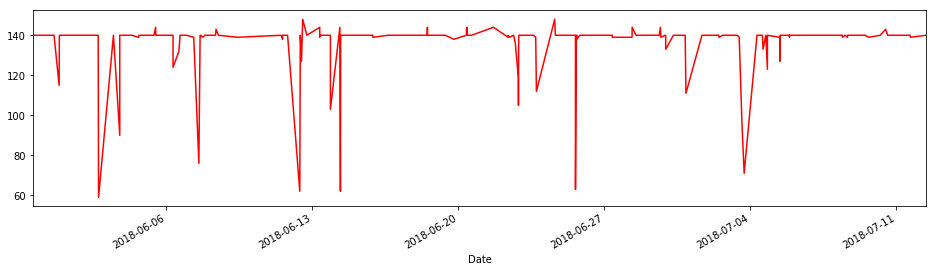

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


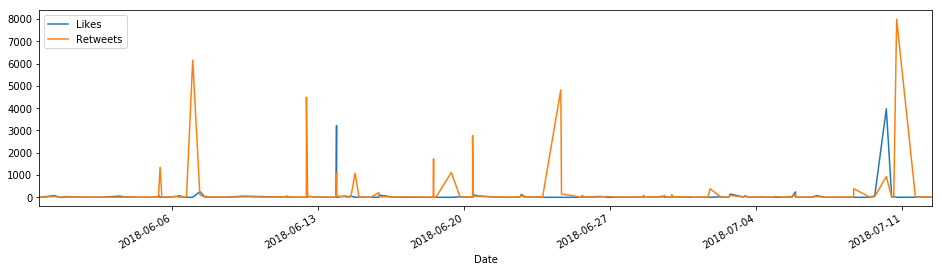

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [17]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [18]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Is May brave enough to tell Trump that his sel...,140,1017353909847908352,2018-07-12 10:24:08,Twitter Web Client,8,7,1
1,RT @VitaeJobs: 📌 @SKinnock is recruiting a pa...,140,1017340772826451968,2018-07-12 09:31:56,Twitter Web Client,0,2,0
2,Doing a deal is not just about words on a piec...,139,1017086695525830656,2018-07-11 16:42:19,Twitter Web Client,23,17,0
3,Govt is obliged to create an Independent Monit...,140,1017076071618007040,2018-07-11 16:00:06,Twitter Web Client,3,2,0
4,RT @appg_brexit: The #ListenUp campaign has be...,140,1017063886393085953,2018-07-11 15:11:41,Twitter Web Client,0,10,1
5,RT @UKLabour: Five things you need to know abo...,140,1016737517465473026,2018-07-10 17:34:48,Twitter for iPhone,0,7994,0
6,Chequers proposal a step in right direction (P...,140,1016686990979469312,2018-07-10 14:14:02,Twitter Web Client,31,13,1
7,British steel industry is hobbled by punitive ...,143,1016651833526358017,2018-07-10 11:54:20,Twitter Web Client,7,8,1
8,Boris Johnson was without doubt the worst Fore...,140,1016558160310611968,2018-07-10 05:42:06,Twitter for iPhone,3974,934,-1
9,The Chequers proposal is a bureaucratic nightm...,139,1016357702174494720,2018-07-09 16:25:33,Twitter Web Client,84,38,1


In [19]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [20]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 53.0%
Percentage of neutral tweets: 33.0%
Percentage de negative tweets: 14.0%
